In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants 
from scipy.optimize import curve_fit
#### PLOT THE DATA #######
SMALL_SIZE = 13.5
MEDIUM_SIZE = 17
BIGGER_SIZE = 23
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [18]:
from ion_properties import lead,calcium,xenon,xenon2nd


Transverse cooling for all ions

In [19]:
# transverse_growth_rate_list=[]
# longitundinal_growth_rate=[]
# ion_names=[ion.name for ion in ions]
# ion_energy=[ion.hw0 for ion in ions]

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})

# for ion_loop in ions:
#     loaded_data = np.load(f'results/transverse/{ion_loop.name}.npz')

#     delta = loaded_data['delta']
#     zeta = loaded_data['zeta']
#     state = loaded_data['state']
#     x = loaded_data['x']
#     time=loaded_data['time']
#     s_per_turn=loaded_data['s_per_turn']
#     px=loaded_data['px']
#     action_x=loaded_data['action_x']
#     action_y=loaded_data['action_y']
#     emittance_x=loaded_data['emittance_x']
#     rms_dp_p = np.std(delta, axis=1)

#     index_closest = np.abs(emittance_x - 0.85*emittance_x[0]).argmin()

#     print(index_closest)

#     # Define the exponential function
#     def exponential_func(x, a, b):
#         return a * np.exp(x * b)
 
#     # Fit the data to the exponential function
#     params_transverse, covariance = curve_fit(exponential_func, time[:index_closest], emittance_x[:index_closest])

#     # Extract the parameters
#     a, b = params_transverse

#     transverse_growth_rate_list.append(b)

#     plt.plot(time,emittance_x*1e6, label=f'{ion_loop.name}', linewidth=5.0)

#     plt.plot(time[:index_closest], exponential_func(time[:index_closest], *params_transverse) * 1e6, linestyle='--', label=f'{ion_loop.name} Fit')
    
# plt.xlabel(r'Time [s]')
# plt.ylabel(r'Normalised emittance $\epsilon_x$ [mm mrad]')
# plt.legend()
# plt.tight_layout()
# plt.savefig('Transverse_laser_cooling_rates.png', dpi=300)
# plt.show()

fit dp/p

In [20]:

# longitundinal_growth_rate=[]
# ion_names=[ion.name for ion in ions]
# ion_energy=[ion.hw0 for ion in ions]

# plt.figure(figsize=(12, 8))
# plt.rcParams.update({'font.size': 25})

# for ion_loop in ions:
#     loaded_data = np.load(f'results/transverse/{ion_loop.name}.npz')

#     delta = loaded_data['delta']
#     zeta = loaded_data['zeta']
#     state = loaded_data['state']
#     x = loaded_data['x']
#     time=loaded_data['time']
#     s_per_turn=loaded_data['s_per_turn']
#     px=loaded_data['px']
#     action_x=loaded_data['action_x']
#     action_y=loaded_data['action_y']
#     emittance_x=loaded_data['emittance_x']
#     rms_dp_p = np.std(delta, axis=1)

#     index_closest = np.abs(rms_dp_p - 0.85*rms_dp_p[0]).argmin()

#      # Define the exponential function
#     def exponential_func(x, a, b):
#         return rms_dp_p[0] * np.exp(x * b)

#     # Fit the data to the exponential function
#     params_transverse, covariance = curve_fit(exponential_func, time[:index_closest], rms_dp_p[:index_closest])

#     # Extract the parameters
#     a, b = params_transverse

#     longitundinal_growth_rate.append(b)

#     plt.plot(time,rms_dp_p*1e6, label=f'{ion_loop.name}', linewidth=5.0)

#     plt.plot(time[:index_closest], exponential_func(time[:index_closest], *params_transverse) * 1e6, linestyle='--', label=f'{ion_loop.name} Fit')

    
# plt.xlabel(r'Time [s]')
# plt.ylabel(r'Normalised emittance $\epsilon_x$ [mm mrad]')
# plt.legend()
# plt.tight_layout()
# plt.savefig('Transverse_laser_cooling_rates.png', dpi=300)
# plt.show()

Also plot dp/p

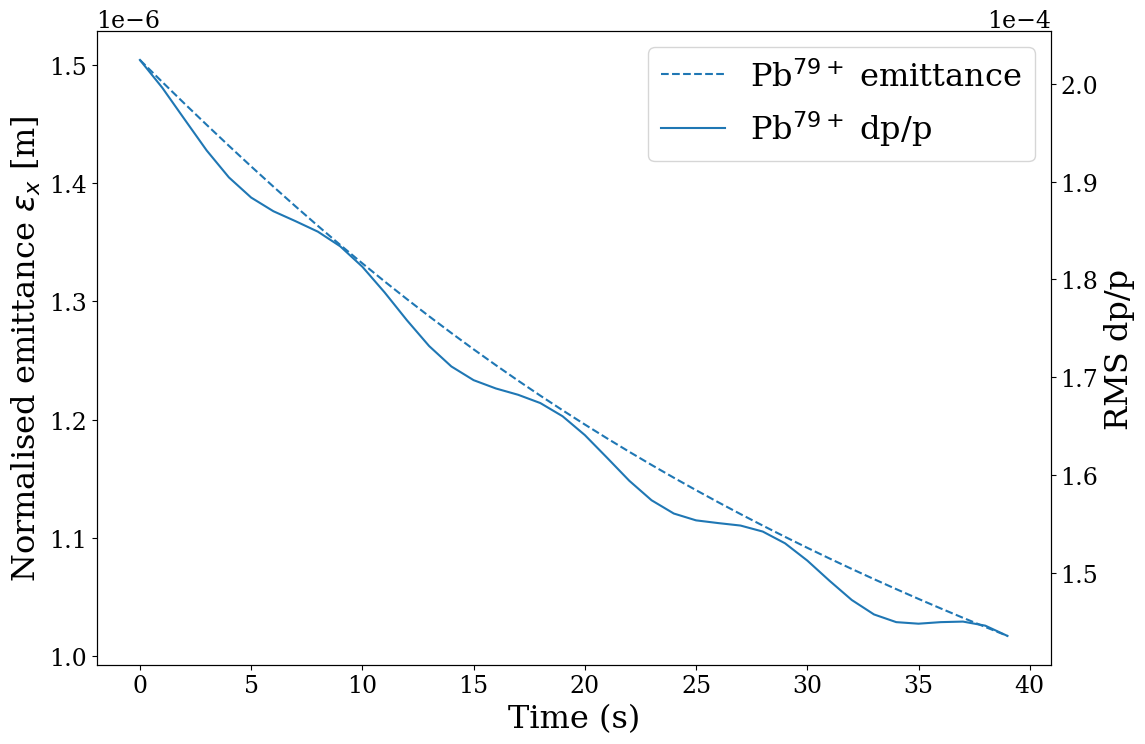

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})

# Create a second y-axis
ax2 = ax1.twinx()

# Lists to store handles and labels
handles = []
labels = []

for ion_loop in [lead]:
    loaded_data = np.load(f'results/transverse/{ion_loop.name}.npz')

    delta = loaded_data['delta']
    zeta = loaded_data['zeta']
    state = loaded_data['state']
    x = loaded_data['x'] 
    time = loaded_data['time']
    s_per_turn = loaded_data['s_per_turn']
    px = loaded_data['px']
    action_x = loaded_data['action_x']
    action_y = loaded_data['action_y']
    emittance_x = loaded_data['emittance_x']
    rms_dp_p = np.std(delta, axis=1)
    
    # Plot on ax1 and collect handles and labels
    line1, = ax1.plot(time, emittance_x, linestyle='--', label=f'{ion_loop.name} emittance')
    handles.append(line1)
    labels.append(f'{ion_loop.name} emittance')
    
    # Plot on ax2 and collect handles and labels
    line2, = ax2.plot(time, rms_dp_p, label=f'{ion_loop.name} dp/p')
    handles.append(line2)
    labels.append(f'{ion_loop.name} dp/p')

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Normalised emittance $\epsilon_x$ [m]')
ax2.set_ylabel('RMS dp/p')
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Combine handles and labels from both axes into a single legend
plt.legend(handles, labels, loc='upper right')

plt.tight_layout()
plt.savefig('Laser_cooling_rates.png', dpi=300)
plt.show()


seperate into two plots for the presentation

Focus on longitudinal cooling

optimal laser position

final emittance

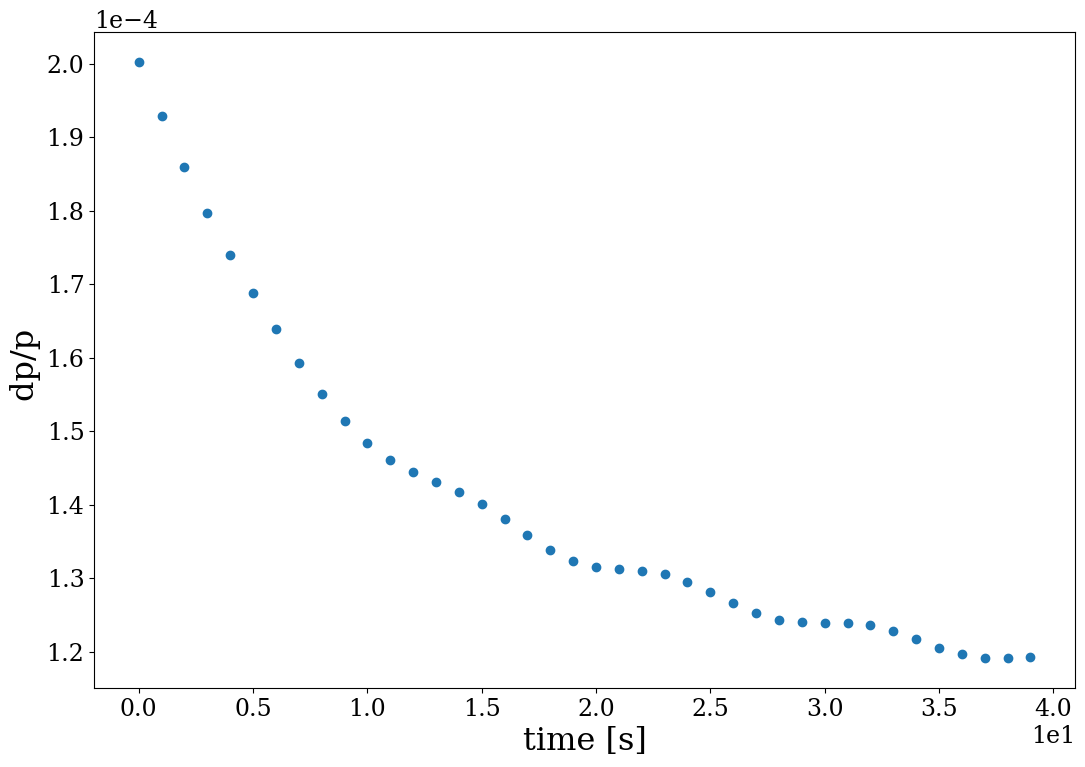

In [37]:
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 25})
plt.scatter(time,np.std(delta,axis=1)) #turns,particles
plt.xlabel('time [s]')
plt.ylabel('dp/p ')
plt.tight_layout()
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#plt.savefig('Last_turn.eps', format='eps', dpi=300)
plt.show()